# 🐶 End-to-end Multiclass-class Dog breed Classification

This notebook builds an end-to-end multiclass image classifier using Tensorflow 2 and Tensorflow Hub.

## 1. Problem

Identifying the breed of the dog from the image

## 2.Data

The data we're using is from Kaggle's dog breed competition

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image

## 4. Features

Some information about the data:

- We're dealing with images( unstructured data ) so it's probably best if we use deep learning/transfer learning
- There are 120 breeds of dogs (120 different classes)
- There are around 10000 images in training(with labels) and test (without labels) set each


In [1]:
# import tensorflow and tensorflow hub
import tensorflow as tf
import tensorflow_hub as hub

# Check the availaibility of GPU
print("GPU", "availaible yayyyy!!!" if tf.config.list_physical_devices(
    "GPU") else "not available😢")


GPU not available😢


## Getting our data ready (Turning into tensors)

With all machine learning models our datas has to be in numeric format.So that's what we will be doing first. Turning our images into tensors
(numerical format)

Let's start by accessing our datas and check out the labels


In [2]:
# Check out the labels of data
import tensorflow_hub as hub
import pandas as pd
labels_csv = pd.read_csv("data/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<AxesSubplot:>

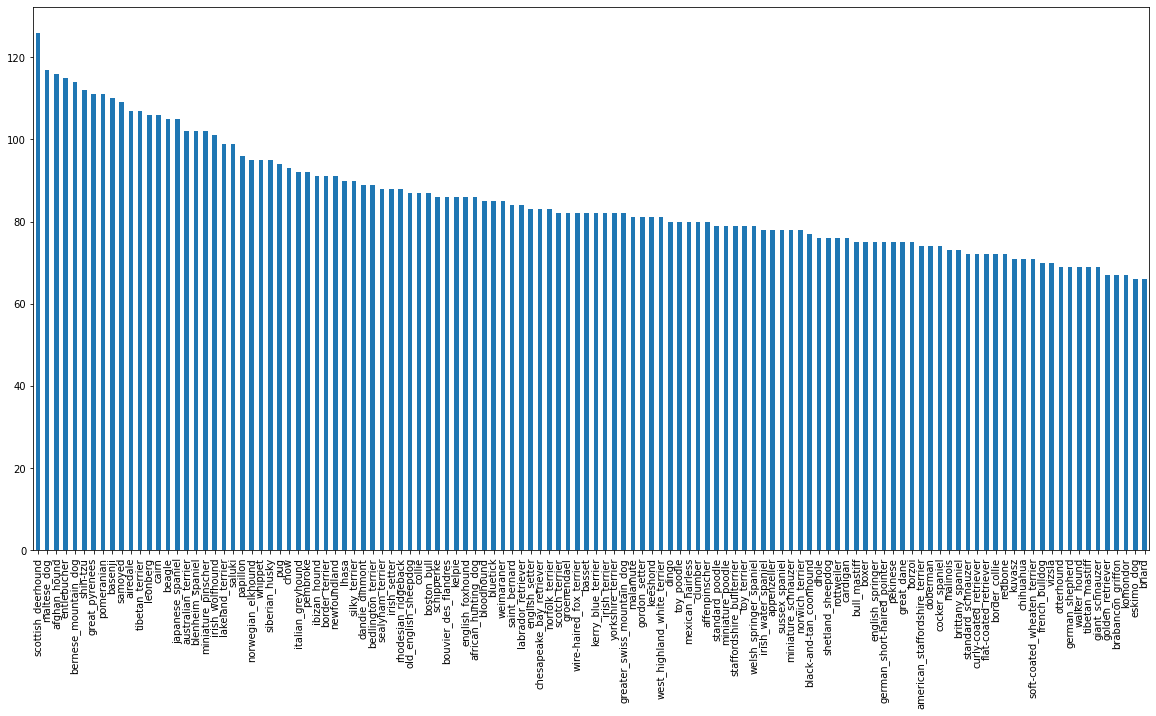

In [3]:
# How much images are there per breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))


### Getting images and their labels

Let's get a list of all of our image file pathnames


In [4]:
labels_csv.head()


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [5]:
labels_csv["breed"].value_counts().median()


82.0

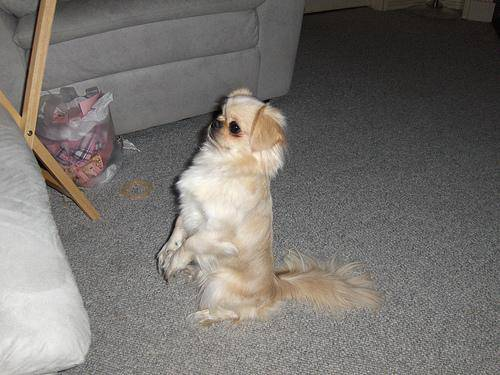

In [6]:
# Let's view our image
from IPython.display import Image
Image("data/train/001cdf01b096e06d78e9e5112d419397.jpg")


### Getting images and their labels

Let's get a list of all of our image file pathnames


In [7]:
labels_csv.head()


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [8]:
# Create pathnames from image id
filenames = ["data/train/"+fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]


['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
# Check whether the number of filenames matches the number of image files
import os
if len(os.listdir("data/train")) == len(filenames):
    print("Filenames matches the actual amount of files !!! Proceed")
else:
    print("Filenames donot match the actual amount of files,check the target directory")


Filenames matches the actual amount of files !!! Proceed


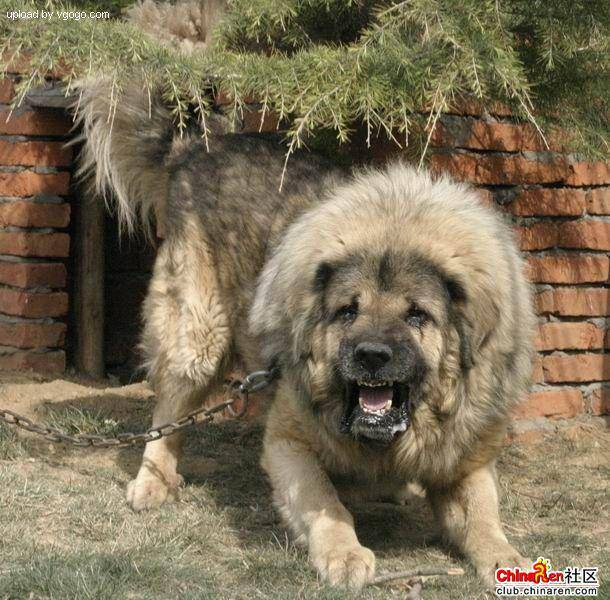

In [10]:
# Check the working of files names
Image(filenames[9000])


In [11]:
labels_csv["breed"][9000]


'tibetan_mastiff'

Since we have got our training images filepath in a list, Let's prepare our labels


In [12]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels_csv["breed"])


In [13]:
labels, labels[5]


(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 'bedlington_terrier')

In [14]:
len(labels)


10222

In [15]:
# See if the number of labels matches the the nu,ber of files names
if len(labels) == len(filenames):
    print("Matched")
else:
    print("Not matched,Check data directory")


Matched


In [16]:
# Find the unique labels
unique_breeds = np.unique(labels)


In [17]:
unique_breeds


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [18]:
len(unique_breeds)


120

In [19]:
# Print a single label into an array of booleans
print(labels[5])
labels[5] == unique_breeds


bedlington_terrier


array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
# Turn every label into a boolean array
boolean_labels = [x == unique_breeds for x in labels]
boolean_labels[:2]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [21]:
# Examples : Turning boolean arrays into integers
print(labels[0])  # original label
# returns the index where the label occurs
print(np.where(unique_breeds == labels[0]))
# Index where the label occurs in the boolean array
print(boolean_labels[0].argmax())
# There will be 1 where the sample lable occurs
print(boolean_labels[0].astype(int))


boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [22]:
# Another example
print(labels[2])
print(boolean_labels[2].astype(int))


pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

Since the data set from kaggle doesn't come with a validation test we're going to create our own


In [23]:
# Set up X and y variables
X = filenames
y = boolean_labels


**Note:** We're going to start off experimenting with ~1000 images and increase the size if needed


In [24]:
# Set the number of images to use for experimenting
NUM_IMAGES = 1000  # @param { type:"slider",min:1000,max:10000,step:500}


In [25]:
# Let's split our data into train and split set

from sklearn.model_selection import train_test_split


# Split data into training and validation sets of total size of NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)


(800, 200, 800, 200)

In [26]:
# Let's have a geez at the training data
X_train[:2], y_train[:2]


(['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False,

### Preprocessing Images (turning images into tensors)

To preprocess our images we're going to write a function which is going to do a few things:

1. Take a image filepath as input
2. Use TensorFlow to read the file and save it to a variable 'image'
3. Turn our 'image'(jpg) into tensors.
4. Normalize our image (convert colour channel values from 0-255 to 0-1)
5. Resize the image to a shape of (224,224)
6. Return the modifoed 'image'

Before we do let's see what importing an image looks like


In [27]:
# Convert image into numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape


(257, 350, 3)

In [28]:
# Turn image into tensor
tf.constant(image)


<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [29]:
# Let's make a fucntion to preprocess image
# Define image size
IMG_SIZE = 224

# Create the function


def process_image(img_path, img_size=IMG_SIZE):
    """
    Take image file path as input and turns them into tensors
    """
    # Read in an image file
    image = tf.io.read_file(img_path)
    # Turn the jpeg image into numerical Tensor with 3 colour channels(Red,Green,Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    # resize the image to our desired value (224,224)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

    return image


In [30]:
tensor = tf.io.read_file(filenames[2])


In [31]:
tf.image.decode_jpeg(tensor, channels=3)


<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[ 97,  97,  89],
        [101, 101,  93],
        [108, 108, 100],
        ...,
        [  9,  11,  10],
        [  9,  11,  10],
        [  9,  11,  10]],

       [[ 99,  99,  91],
        [102, 102,  94],
        [107, 107,  99],
        ...,
        [ 17,  19,  18],
        [ 17,  19,  18],
        [ 17,  19,  18]],

       [[ 98,  97,  92],
        [ 99,  98,  93],
        [102, 101,  96],
        ...,
        [  6,   8,   7],
        [  6,   8,   7],
        [  6,   8,   7]],

       ...,

       [[192, 191, 186],
        [193, 192, 187],
        [195, 194, 189],
        ...,
        [118, 117, 113],
        [129, 128, 124],
        [127, 126, 122]],

       [[198, 197, 192],
        [199, 198, 193],
        [200, 199, 194],
        ...,
        [115, 115, 107],
        [107, 106, 101],
        [108, 108, 100]],

       [[199, 198, 193],
        [200, 199, 194],
        [202, 201, 196],
        ...,
        [ 95,  95,  8

## Turning our data into batches(32 batch size)

### Inorder for the Tensorflow to work efficiently we need our data in form of tuple which looks like: (image,label)


In [32]:
# Create a simple fucntion to return a tuple (image , label)
def get_image_label(image_path, label):
    """
    Take a image path and associated label process the image and return a tuple of (image,label) 
    """
    image = process_image(image_path)
    return image, label


In [33]:
# Demo of the above
process_image(X[42]),  tf.constant(y[42])


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensor: (image,label).

Let's make a function to turn all of our data ('X' & 'y') into batches!


In [34]:
# Define a batch size
BATCH_SIZE = 32  # Defaut is 32

# Create a function to turn data into batches


def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Create batches of data out of image (X) and label (y) pairs
    Shuffules the data if it is a training data but doesn't shuffule if it is a validation or test data.
    Also accepts test data as input(no labels).
    """

    # If the data is a test data set , we don't have the labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices(
            (tf.constant(X)))  # Only file paths no labels
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch

    # If the data is a valid dataset, we don't need to shuffule it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # Filepaths
                                                   tf.constant(y)))  # labels
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch

    else:
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        # Shuffuling pathnames and images before mapping image processor is faster than shuffuling images
        data = data.shuffle(buffer_size=len(X))

        # Create image label tuple (this also turn our image path into preprocess images)
        data = data.map(get_image_label)

        # Turning to batches
        data_batch = data.batch(batch_size)
        return data_batch


In [35]:
# Create training and validation batches
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)


Creating training data batches...
Creating validation data batches...


In [36]:
# Check out the different attributes of our data batches
train_data.element_spec, valid_data.element_spec


((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data batches

Our data is now in batches,however, this can be a little hard to understand/comphrehend


In [37]:
import matplotlib.pyplot as plt

# Create fucntion for viewing images in a data batches


def show_images(images, labels, count=25):
    """
    Displays a plot of images of count number and their label from data batch
    """
    # Set up the figure
    plt.figure(figsize=(20, 15))

    # loop through count (to display count number of images)
    for i in range(count):
        # Create subplots(5rows,5columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])

        # Add the image labels as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn the grid lines off
        plt.axis("off")


In [38]:
y[0]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [39]:
y[0].argmax()


19

In [40]:
unique_breeds[y[0].argmax()]


'boston_bull'

In [41]:
train_data


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [42]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels


(array([[[[0.20742299, 0.25280112, 0.08417367],
          [0.17643557, 0.23525912, 0.0744748 ],
          [0.16502102, 0.23728994, 0.06754202],
          ...,
          [0.5411426 , 0.5602252 , 0.40269732],
          [0.45619744, 0.48757   , 0.29429293],
          [0.51327085, 0.5533619 , 0.34289265]],
 
         [[0.22002803, 0.27149862, 0.10038516],
          [0.19824931, 0.25707284, 0.09677872],
          [0.19058125, 0.2611695 , 0.10094538],
          ...,
          [0.47524598, 0.49719968, 0.3290976 ],
          [0.43987867, 0.47125122, 0.27958453],
          [0.47633082, 0.51537144, 0.31771743]],
 
         [[0.21460086, 0.27685577, 0.10875351],
          [0.21060926, 0.27114847, 0.12114847],
          [0.1979692 , 0.26855743, 0.11365547],
          ...,
          [0.45945308, 0.4829825 , 0.29915893],
          [0.41228876, 0.4436613 , 0.25591618],
          [0.48413903, 0.51943314, 0.33511937]],
 
         ...,
 
         [[0.23679973, 0.2222339 , 0.11179973],
          [0.48228

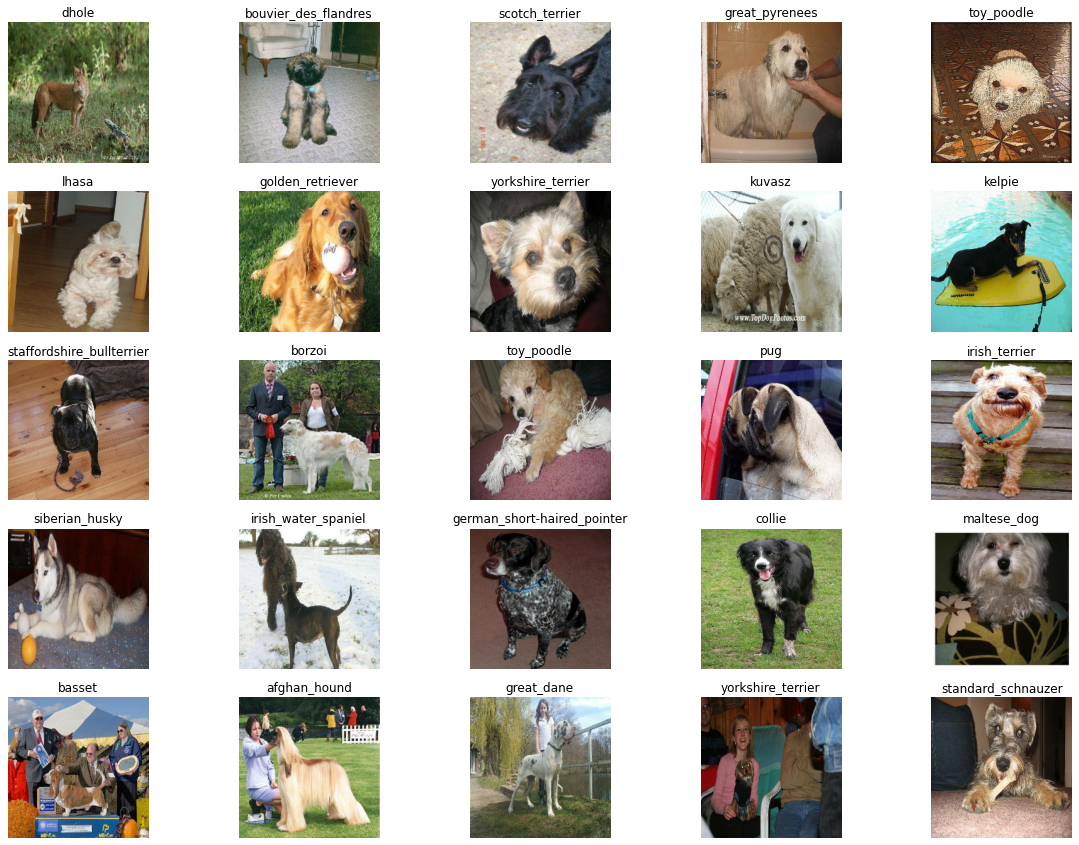

In [43]:
# Now let's the visualize  the data in training batch
show_images(train_images, train_labels)


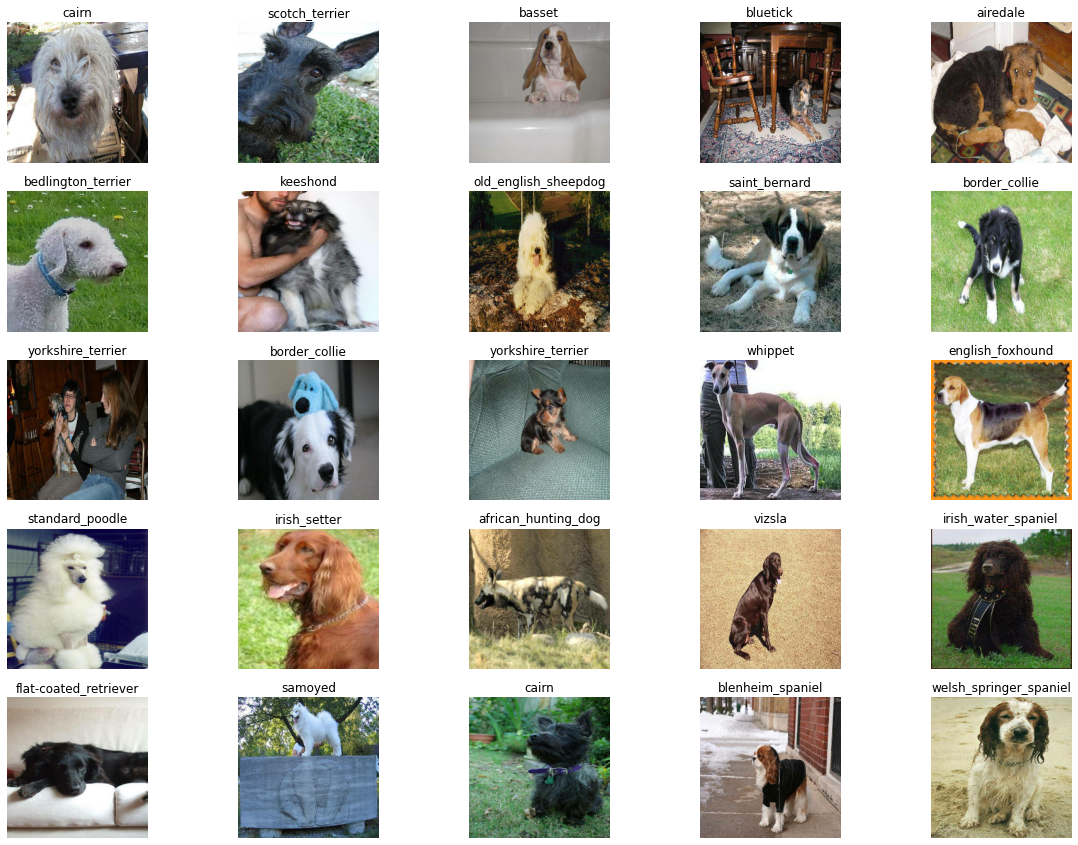

In [44]:
# Now let's visualize the validation set
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_images(valid_images, valid_labels)


## Buliding a model

Before we build a model there are 3 things we need to define:

- The input shape(our images shape, in the form of Tensors) to our model.
- The output shape(the images labels in the form of Tensor) of our model.
- The URL of the model we want to use.(In case of Transfer learning) from Tensorflow Hub:https://tfhub.dev/


In [45]:
# Setup the input shape to the model
# Batch , height , width , colour channels
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup the output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

# Set up the model url from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


Now we've got our inputs and outputs and model ready to go. Let's put them together into Keras deep learning model!

Knowing this let's create a fucntion which:

- Take the input shape, output shape and modelwe have choosen as parameters.
- Defines the layers in a Keras model in a sequential fashion(do this , then do this ,then that...).
- Compiles the model (Say it should be evaluated and improved).
- Builds the model(Tells the model the input shape it would be getting).
- Finally returns the model.


In [46]:
# Creates a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with ", model_url)

    # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url),  # 1st layer (input layer)
        tf.keras.layers.Dense(units=output_shape,
                              activation='softmax')  # 2nd layer (output layer)
    ])

    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    # Build the model
    model.build(input_shape)

    return model


In [47]:
model = create_model()
model.summary()


Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


OSError: SavedModel file does not exist at: C:\Users\Hp\AppData\Local\Temp\tfhub_modules\2c858e9d5fe42a1181c58c70d67244f7619f2ab2\{saved_model.pbtxt|saved_model.pb}

## Creating Calbacks

Callbacks are helper functions a model can use during a training to do such a thing as save its progress, check it's progress pr stop training early if the model starts improving.

We'll create two callbacks, One for Tensorboard which helps track our models progress. And another for early stopping which prevent the model for training too long


### TensorBoard Callback

To set up the TensorBoard callback we need to do 3 things:

1. Load the TensorBoard notebook extension✅
2. Create a TensorBoard callback which is able to save the logs to a directory and pass it to our model's 'fit()' fucntion.✅
3. Visualize our model's training log with the '%tensorboard' magic function (we'll do it after training our model).✅

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard


In [51]:
# Load the Tensorboard notebook extension
# %load_ext tensorboard


In [52]:
import datetime

# Create a function to build a TensorBoard callback


def create_tensorboard_callback():
    # Create a log directory to store TensorBoard log
    logdir = os.path.join("timelogs",
                          # Make it so that the log gets tracked whenever we run an experimenet
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

    return tf.keras.callbacks.TensorBoard(logdir)


### Early Stopping Callbacks

Early stopping helps our model to stop our model from ovefitting by stopping the training if certain evauating metrics stop improving.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


In [53]:
# Create an early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)


## Training a model (on a subset of data)

Our first model is going to train only 1000 images,to make sure everything is working.


In [54]:
NUM_EPOCHS = 100  # @param {type:"slider",min:10,max:100,step:10}


Let's create a function which trains a model

- Create a model using 'create_model()'
- Setup the TensorBoard callback using 'create_tensorboard_callback()'
- Call the 'fit()' function on our model passing it the training data, validation data,number of epochs to train for(NUM_EPOCHS) and the callback we would like to use.
- Return the model


In [55]:
# Buiild the function to train and return the model
def train_model():
    """
    Train a given model return a trainde version
    """

    # Create a model
    model = create_model()

    # Create a new TensorBoard callback session every time we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callback we created
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=valid_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])

    return model


In [56]:
# Fit the model to the data
# model = train_model()


### Checking the TensorBoard Logs

The TensorBoard magic fucntion ('%tensorboard') will access the logs directory we created earlier and visualize it's content


In [57]:
# %tensorboard --logdir  C:\Users\Hp\Desktop\ml-project\dog-vision\timelogs


In [58]:
# data = "<IPython.core.display.HTML object>"
# with open("data.html", "w") as file:
#     file.write(data)


In [59]:
model = load_model('C:/Users/Hp/Desktop/ml-project/dog-vision/models\\20220309-234812-1000-images-mobilenetV2-Adam.h5')

Loading model from : C:/Users/Hp/Desktop/ml-project/dog-vision/models\20220309-234812-1000-images-mobilenetV2-Adam.h5


In [60]:
valid_data


<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [61]:
# Make prediction on validation set (not used on training data)
predictions = model.predict(valid_data, verbose=1)
predictions


7/7 [==============================] - 9s 1s/step


array([[1.9749012e-03, 3.7607920e-04, 1.0597882e-03, ..., 3.4445076e-04,
        7.0125920e-05, 1.3343768e-02],
       [3.5012641e-03, 2.1179437e-03, 4.4120748e-02, ..., 7.8463834e-04,
        1.7029942e-03, 4.3701301e-03],
       [2.2412843e-05, 9.6724409e-04, 5.3323916e-04, ..., 7.0368907e-05,
        2.0057891e-05, 2.7595100e-04],
       ...,
       [8.4940868e-05, 3.8345429e-04, 4.6232002e-05, ..., 5.2777057e-05,
        3.5181048e-04, 4.6961106e-04],
       [1.0963191e-02, 7.5395417e-04, 1.5720115e-04, ..., 1.0174102e-04,
        1.3920292e-04, 1.2605028e-02],
       [3.3103803e-03, 5.7013483e-05, 3.0944678e-03, ..., 2.2028448e-02,
        5.6038192e-04, 3.2493469e-04]], dtype=float32)

In [62]:
predictions.shape


(200, 120)

In [63]:
# First prediciton
index = 42
print(predictions[index])
print(f"Max value (probability of prediction):{np.max(predictions[index])}")
print(f"Sum:{np.sum(predictions[index])}")
print(f"Max index:{np.argmax(predictions[index])}")
print(f"Predicted label:{unique_breeds[np.argmax(predictions[index])]}")


[8.53640086e-04 1.95345187e-04 1.28941901e-04 1.02298953e-04
 1.44132189e-02 1.53288565e-04 1.94685883e-04 9.53756273e-04
 1.45940324e-02 3.34573798e-02 1.46106486e-05 1.80853440e-05
 8.33812985e-04 6.88351551e-03 3.29028163e-03 4.88073425e-03
 9.31773029e-05 6.07439433e-04 4.76179615e-04 3.26572597e-04
 6.57993296e-05 3.20209377e-03 7.94994339e-05 4.04314982e-04
 2.87032756e-03 2.97201448e-04 7.60649855e-05 7.26506987e-05
 1.66879618e-04 2.53134524e-04 6.73016621e-05 9.19334561e-05
 3.46498098e-04 1.95677436e-04 3.89781162e-05 3.45850349e-05
 3.75294068e-04 2.80150678e-04 2.38101056e-04 2.41648540e-01
 1.86773177e-04 7.69793842e-05 2.07989793e-02 5.26534641e-05
 1.62331411e-03 4.34140347e-05 6.51005015e-04 7.52526917e-04
 2.56570056e-04 2.61963258e-04 3.10511532e-04 1.33749520e-04
 8.24190734e-04 2.48111598e-03 4.83091499e-05 1.56140653e-03
 9.92020126e-04 4.14974493e-05 7.03837068e-05 6.36725526e-05
 7.56467125e-05 7.29235297e-04 4.28894673e-05 5.65843002e-05
 7.25020218e-05 3.351412

In [64]:
np.sum(predictions[index])


1.0

In [65]:
np.argmax(predictions[index])


113

In [66]:
predictions[42][113]


0.61125946

In [67]:
np.max(predictions[index])


0.61125946

Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image prediction is being mode on.

**Note:** Prediction probabilities are also called as confidence levels.


In [68]:
# Turn prediciton probabilties into their respective levels.(easier to understand)
def get_pred_label(prediciton_probabilties):
    """
    Turns an array of prediciton probabilities into a label

    Args:
        prediciton_probabilties (_type_): array/list
    """
    return unique_breeds[np.argmax([prediciton_probabilties])]


In [69]:
# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[69])
pred_label


'irish_terrier'

In [70]:
valid_data


<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

Now since our validation dataset is still in a batch dataset , we need to unbatch it to make predictions on the validation images and then compare those predictions the validation labels(truth labels).


In [71]:
images_ = []
labels_ = []

# Loop through the unbatched data
for image, label in valid_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

images_[0], labels_[0]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [72]:
get_pred_label(labels_[0])


'cairn'

In [73]:

get_pred_label(predictions[0])


'border_terrier'

In [74]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image,labels) Tensors and return separate arrays of images and labels.

    """
    images = []
    labels = []
    # Loop through unbatched data
    for image_, label_ in data.unbatch().as_numpy_iterator():
        images.append(image_)
        labels.append(unique_breeds[np.argmax(label_)])

    return images, labels


In [75]:
# Unbatch the validation data
val_images, val_labels = unbatchify(valid_data)

val_images[0], val_labels[0]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [76]:
len(val_images)


200

In [77]:
len(val_labels)


200

In [78]:
len(val_images[0]), len(val_labels[0])


(224, 5)

In [79]:
get_pred_label(val_labels[0])


'affenpinscher'

Now we've got the ways to get :

- Predictions lables
- Validations labels(truth labels)
- Validation Images

  Now let's make some function to make these all a bit more visualizing.


We'll create a function which:

- Takes an array of prediciton probabilities, an array of truth labels and an array of images and an integers.✅
- Convert the predicted probabilities to a predicted label.✅
- Plot the predicted label, it's predicted probability, the truth label and the target image on a single plot.✅


In [80]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediciton, ground truth and image for sample n.

    Args:
        prediciton_probabilities(list) : array of prediciton probabilities
        labels (list):array of truth labels
        images (list): array of images
        n (int, optional): sample size . Defaults to 1.
    """
    pred_prob, true_label, img = prediction_probabilities[n], labels[n], images[n]

    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    # Plot the image and remove the ticks
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

    # Change the colour depending on the prediciton whether it is right or wrong
    if pred_label == true_label:
        colour = "green"
    else:
        colour = "red"

    # Change the plot title to be predicted , probability of predicitons and truth label
    plt.title("{} - {:.2f}% - {}".format(pred_label,
                                         np.max(pred_prob)*100,
                                         true_label),
              color=colour)


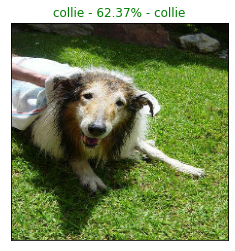

In [81]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images, n=96)


Let's make a function to to view our model top 10 predicitons.

The function will:

- Take an input of predicion probabilities array and ground truth array and an integer.
- Find the prediction using 'get_pred_label()'.
- Find the top 10:
  - Prediction probabilities indexes.✅
  - Prediction probabilities value.✅
  - Prediction labels.✅
- Plot the top 10 prediction probabilitiy values and labels , colouring the true labels green


In [82]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plots the top 10 highest predciiton confidence along with the truth label for sample n

    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Get the predicted labels
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 predicitons confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction cnfidence value
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediciton label
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # Setup the plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")

    # Change the colour of the true label labels
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)
                 ].set_color("green")
    else:
        pass


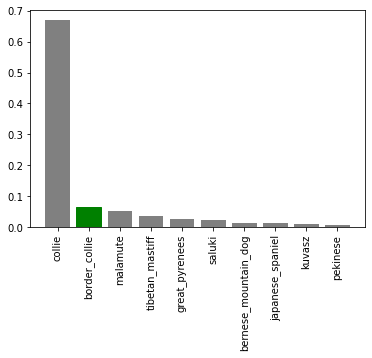

In [83]:
plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=9)


Now we've got functions to visualize our predictions and evaluate our model. Let's check out few


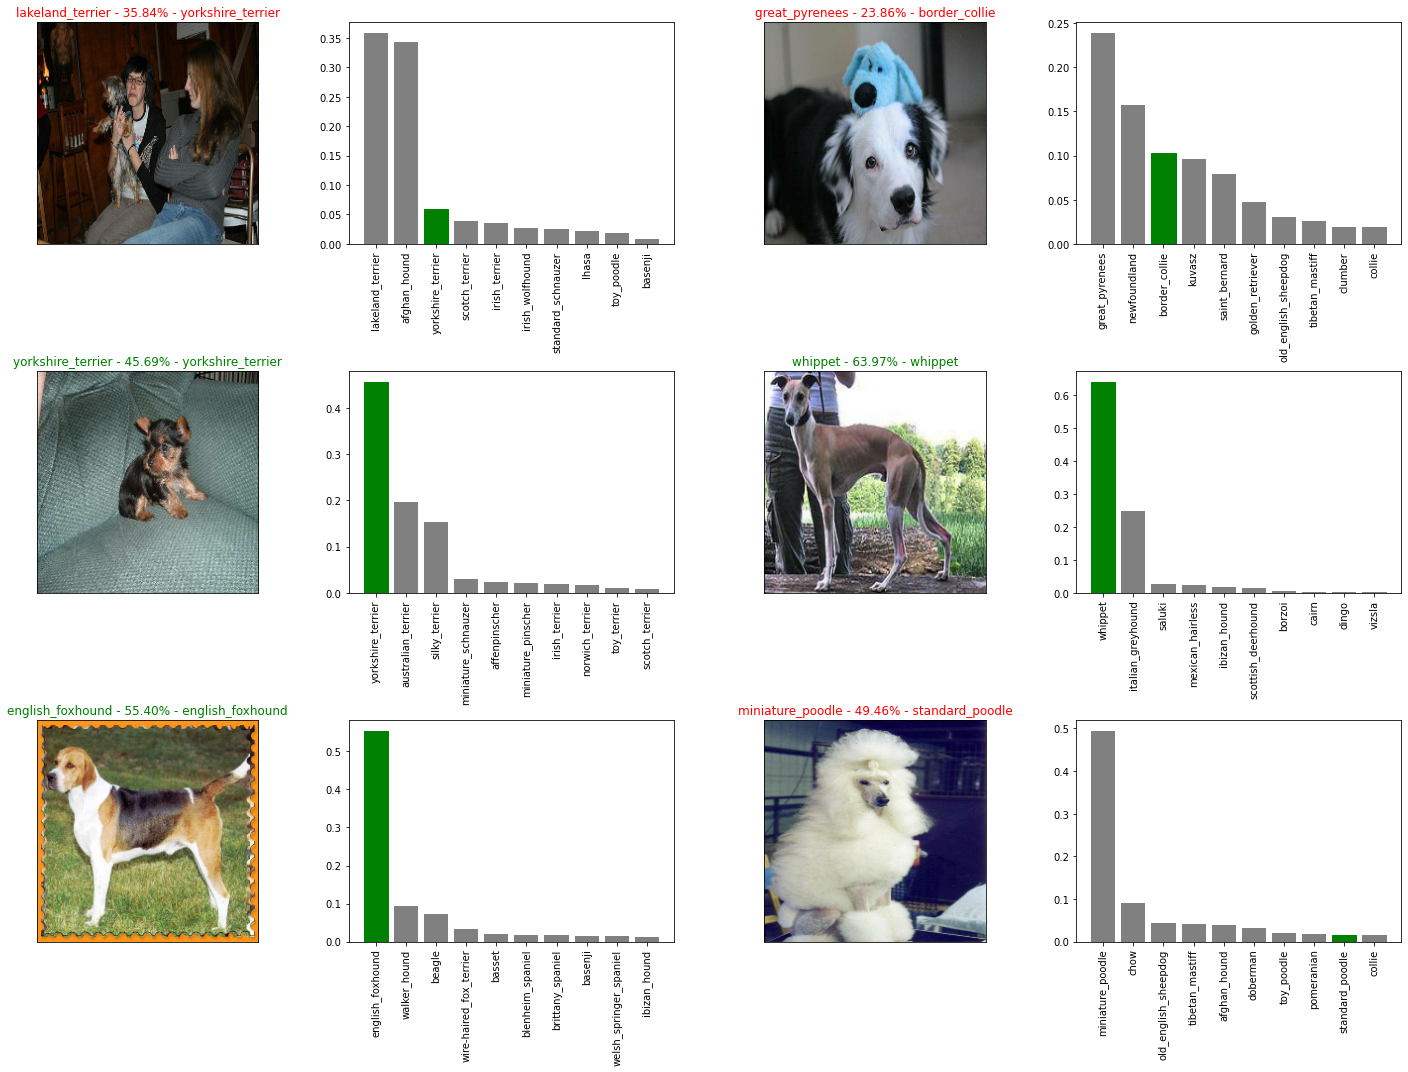

In [84]:
# Let's check out few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols,2*i+1)
    plot_pred(prediction_probabilities = predictions,
              labels = val_labels,
              images = val_images,
              n = i+i_multiplier)
    plt.subplot(num_rows ,2*num_cols,2*i+2)
    plot_pred_conf(prediction_probabilities = predictions,
                   labels = val_labels,
                   n = i+i_multiplier)
plt.tight_layout(h_pad = 1) 
plt.show()


## Saving and Reloding our trained model



In [1]:
# Create a function to save model
def save_model(model , suffix=None):
    """
    Save a given model in a model directory and appends a suffix (string).

    """
    # Create model directory pathname with current time
    model_dir = os.path.join("C:/Users/Hp/Desktop/ml-project/dog-vision/models",
                            datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path = model_dir + "-" +suffix + ".h5" # Save format of a model
    print(f"Saving model to : {model_path}")
    model.save(model_path)
    return model_path

In [2]:
# Create a function to load a model
def load_model(model_path):
    """
    Loads a save model from specified path
    """
    print(f"Loading model from : {model_path}")
    model = tf.keras.models.load_model(model_path,
                                        custom_objects ={"KerasLayer":hub.KerasLayer})
    return model
    

Now we've got functions to save and load a trained model , Let's make sure they work

In [87]:
# Save our model trained on 1000 images 
# save_model(model,suffix = "1000-images-mobilenetV2-Adam")

In [88]:
# Load the model
loaded_1000_image_model = load_model('C:/Users/Hp/Desktop/ml-project/dog-vision/models\\20220309-234812-1000-images-mobilenetV2-Adam.h5')

Loading model from : C:/Users/Hp/Desktop/ml-project/dog-vision/models\20220309-234812-1000-images-mobilenetV2-Adam.h5


In [89]:
# Evaluate the pre-saved model
model.evaluate(valid_data)

7/7 [==============================] - 9s 1s/step - loss: 1.3422 - accuracy: 0.6150


[1.3422149419784546, 0.6150000095367432]

In [90]:
 # Evaluate the loaded model 
loaded_1000_image_model.evaluate(valid_data)

7/7 [==============================] - 8s 1s/step - loss: 1.3422 - accuracy: 0.6150


[1.3422149419784546, 0.6150000095367432]

# Training a model (on full data)

Now as we know our model works on a subset of the data , now we can move forward to train our model on the full data

Above we saved all the training file path to 'X' and all the labels to 'y'.Let's check them out

In [91]:
# Remind ourselves the full lenght of the full dataset
len(X) , len(y)

(10222, 10222)

So, we have got over 10,000 images to train on. 

Before we can train on these we have to turn them into data batches. 



In [92]:
full_data = create_data_batches(X,y)

Creating training data batches...


And we have already constructed the function to convert into data batches

In [93]:
# Instanctiate a new model for training the on tht full dataset 
full_model = create_model()

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Since we have a new model instance ('full_model') we also need some callbacks

In [94]:
# Create full model callbacks

# Tensor board callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all data , therefore we can't monitor validation accuracy
full_model_earlystopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                             patience = 3)

To monitor the model while it trains, We'll load the TensorBoard (it should update every 30 sec or so while model trains)

In [95]:
# %tensorboard --logdir C:/Users/Hp/Desktop/ml-project/dog-vision/timelogs

**Note:** Since running the cell below will cause the model to train on full data(10,000+) images, it may take a fairly long time to get started and finish. However because of our 'early_stopping_callback()', it'll stop before its goes too long

In [96]:
# # Fit the full model to the full training dataset 
#  full_model.fit(x = full_data,
#                epochs = NUM_EPOCHS,
#                callbacks = [full_model_tensorboard,
#                              full_model_earlystopping])

### Saving and Reloding the full model

It took a long time to train our model.So it's good idea to save it.

We can do so using our 'save_model()' function

In [97]:
# Save the model to a file
# save_model(full_model,suffix = "full-trained-model-Adam")

In [1]:
# laod the full model
loaded_full_model = load_model("C:/Users/Hp/Desktop/ml-project/dog-vision/models/20220312-145716-full-trained-model-Adam.h5")

NameError: name 'load_model' is not defined

### Making predictions on the full  test datasets

Since our model is trained on images in the form of tensor batches, to make predictions on the test data we've to convert the test images into tensor batches. 

We will use the 'create_data_batches()' we created earlier which can take a list of filenames as input and convert them into Tensors batches.

To make predictions on the test data we'll:
* Get the test image filenames.
* Convert the filenames into test databatches using 'create_data_batches()' and setting the test_data parameter as True (Since there are no labels in the test datasets).
* Make a predicitons array by passing the testdata batches into the 'predict()' function.

In [99]:
# Load the test images filenames(since we're using os.listdir(), these already have .jpg)
test_path = "C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/000621fb3cbb32d8935728e48679680e.jpg',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/00102ee9d8eb90812350685311fe5890.jpg',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/002f80396f1e3db687c5932d7978b196.jpg',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [1]:
len(test_filenames)

NameError: name 'test_filenames' is not defined

In [101]:
# Create test data batches 
test_data = create_data_batches(test_filenames , test_data = True)

Creating test data batches...


**Note:** Since there are 10000+ images predicitons may take a while

In [102]:
# Make predictions
test_predictions = loaded_full_model.predict(test_data,
                                              verbose = 1)

324/324 [==============================] - 373s 1s/step


In [103]:
# Check out the test predictions
test_predictions[:10]

array([[1.01912385e-11, 3.72403844e-12, 1.13208096e-14, ...,
        2.21040651e-14, 2.33527836e-10, 7.76544280e-12],
       [4.54000701e-06, 1.44500416e-06, 6.26545082e-09, ...,
        5.44232628e-12, 1.33715162e-07, 6.94770297e-10],
       [1.69017925e-11, 5.02270666e-07, 3.20413474e-09, ...,
        2.15541672e-06, 3.16584779e-11, 5.57197483e-11],
       ...,
       [4.18633794e-09, 1.56458513e-10, 2.45459608e-11, ...,
        1.17963386e-12, 1.38363002e-11, 2.97181238e-11],
       [1.81953948e-11, 6.99196465e-11, 5.35235294e-11, ...,
        4.53265159e-07, 2.16518559e-09, 6.13675733e-12],
       [1.36557698e-09, 1.69332881e-11, 2.43922625e-11, ...,
        7.56043177e-13, 1.32295052e-11, 3.64669788e-08]], dtype=float32)

### Preparing the test datasets predicitons for Kaggle

Looking at the Kaggle sample submission, it looks like they want the models output probabilities each for label along with the image ID's.

To get the data in this format, we'll:
* Create a pandas dataframe with an id column as well as a column for each dog breed.
* Add data to the id column by exctarcting the image id from their filepath.
* Add data (prediciton probabilities) to each of the dog breed columns using the 'unique_breed' list and the test predicitons list.
* Export dataframe to a csv file to submit it to the kaggle server.

In [104]:
# Create a pandas dataframe with empty columns
preds_df = pd.DataFrame(columns = ["id"]+list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [105]:
# Append the test images id to the predition dataframe
test_path = "C:/Users/Hp/Desktop/ml-project/dog-vision/data/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [106]:
# Add the predicitons probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df[1566:1570]

id  affenpinscher  afghan_hound  \
1566  259c335dd147a07cfef627b70f9db5ac   7.916234e-10  3.044575e-12   
1567  259d3bbadf0046d242d3919c26ea60b9   3.500140e-12  9.778940e-11   
1568  25a29473a494fcb7650d545e4face02e   5.064503e-10  9.517370e-11   
1569  25a8f0ff09e61a6b5654efd8c3ea62e3   3.353508e-09  2.221898e-11   

      african_hunting_dog      airedale  american_staffordshire_terrier  \
1566         2.497240e-12  1.257232e-08                    6.326289e-11   
1567         3.990354e-06  8.664983e-11                    7.146683e-10   
1568         9.260517e-14  5.989229e-11                    1.934874e-07   
1569         6.658404e-09  3.436088e-08                    9.191602e-02   

       appenzeller  australian_terrier       basenji        basset  ...  \
1566  2.838569e-13        3.549086e-05  3.564290e-10  6.495004e-11  ...   
1567  2.230149e-03        1.871123e-08  1.354666e-09  4.858045e-12  ...   
1568  2.574426e-12        6.277555e-08  7.699798e-09  6.097114e-11  ...   
1569  2.068027e-09        9.472924e-06  3.944583e-09  1.571072e-06  ...   

        toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
1566  9.473353e-10  5.863394e-08  1.644488e-08  5.209713e-11  4.814434e-13   
1567  6.741056e-10  3.581367e-06  9.002541e-12  1.160077e-12  4.425794e-10   
1568  9.900814e-09  9.718611e-10  4.315580e-09  3.350410e-09  8.548320e-11   
1569  5.170606e-06  7.147392e-07  6.513086e-06  2.813941e-09  5.835179e-01   

      welsh_springer_spaniel  west_highland_white_terrier       whippet  \
1566            7.300692e-11                 1.214619e-10  9.717634e-10   
1567            2.698062e-12                 4.485662e-08  3.478036e-10   
1568            7.489619e-10                 4.308558e-12  3.697659e-10   
1569            2.633087e-09                 3.800152e-09  1.275470e-06   

      wire-haired_fox_terrier  yorkshire_terrier  
1566             1.160887e-10       4.412660e-09  
1567             5.174633e-10       4.537620e-08  
1568             6.042988e-11       9.840850e-09  
1569             2.345943e-10       3.029130e-07  

[4 rows x 121 columns]

In [108]:
# preds_df.to_csv("C:/Users/Hp/Desktop/ml-project/dog-vision/Full_submission_1_mobilenetV2_adam.csv",
                # index = False)


### Making perditions on custom images

To do so, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [109]:
# Get the custom images filepath
custom_path = "C:/Users/Hp/Desktop/ml-project/dog-vision/data/custom_images/"
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [110]:
custom_image_path

['C:/Users/Hp/Desktop/ml-project/dog-vision/data/custom_images/dog2.jfif',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/custom_images/dog3.jfif',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/custom_images/dog4.jfif',
 'C:/Users/Hp/Desktop/ml-project/dog-vision/data/custom_images/istockphoto-1184184060-170667a.jpg']

In [111]:
# Turn the custom data into data batches (test_data = True as there are no labels)
custom_data = create_data_batches(custom_image_path,test_data = True)

Creating test data batches...


In [112]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [113]:
# Get custom images preditons labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['japanese_spaniel', 'malamute', 'pug', 'golden_retriever']

In [114]:
# Now to unbathcify it
custom_images = []
# Loop through the unbatche data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

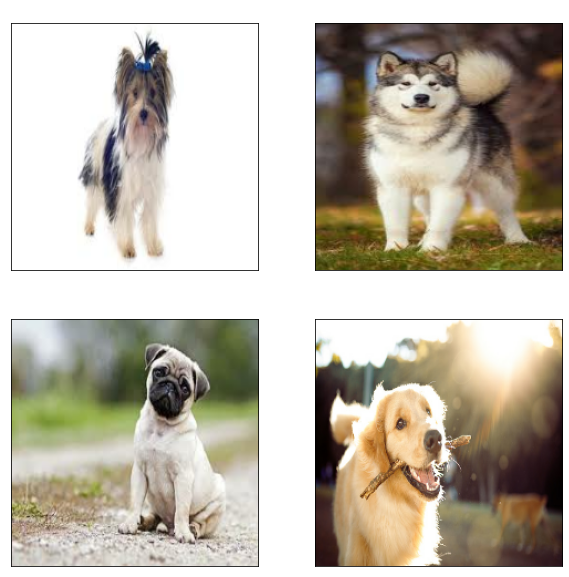

In [115]:
# Check the custom image predictions
plt.figure(figsize = (10,10))
for i, image in enumerate(custom_images):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i],color = "white")
    plt.imshow(image)


